In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set_style("white")

In [4]:
mine = pd.read_csv("D:/DOWNLOADS/mine.csv")
states=gpd.read_file("D:/DOWNLOADS/states2.json")
mine.head()

,Mineral Type,Mineral,Unit,State,Quantity 2016/17,Value 2016/17 (In thousand Rupees),Quantity 2017/18,Value 2017/18 (In thousand Rupees),Quantity 2018/19 (P),Value 2018/19 (In thousand Rupees)
0,Metallic,Bauxite,000 tonne,Chhattisgarh,1954.23,136.5345,2558.70,219.9036,1532.60,157.3656
1,Metallic,Bauxite,000 tonne,Goa,0.00,0.0000,4.38,0.0876,0.52,0.0104
2,Metallic,Bauxite,000 tonne,Gujarat,5881.26,312.7056,3559.24,212.9517,2181.06,129.3201
3,Metallic,Bauxite,000 tonne,Jharkhand,2289.83,164.2791,2593.65,227.5062,2412.48,219.8169
4,Metallic,Bauxite,000 tonne,Karnataka,0.39,0.0171,0.00,0.0000,0.00,0.0000


In [5]:
mine.dropna(axis=0,inplace=True)

In [6]:
mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Mineral Type                        137 non-null    object 
 1   Mineral                             137 non-null    object 
 2   Unit                                137 non-null    object 
 3   State                               137 non-null    object 
 4   Quantity 2016/17                    137 non-null    float64
 5   Value 2016/17 (In thousand Rupees)  137 non-null    float64
 6   Quantity 2017/18                    137 non-null    float64
 7   Value 2017/18 (In thousand Rupees)  137 non-null    float64
 8   Quantity 2018/19 (P)                137 non-null    float64
 9   Value 2018/19 (In thousand Rupees)  137 non-null    float64
dtypes: float64(6), object(4)
memory usage: 10.8+ KB


In [7]:
mine.describe()

,Quantity 2016/17,Value 2016/17 (In thousand Rupees),Quantity 2017/18,Value 2017/18 (In thousand Rupees),Quantity 2018/19 (P),Value 2018/19 (In thousand Rupees)
count,1.370000e+02,137.000000,1.370000e+02,137.000000,1.370000e+02,137.000000
mean,2.639256e+04,348.823342,2.576520e+04,436.719108,2.563841e+04,534.725216
std,1.901940e+05,1267.424195,1.628310e+05,1672.648445,1.571285e+05,2438.293909
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.858000e+01,1.145000,5.375000e+01,1.912000,4.697000e+01,1.708200
75%,2.289830e+03,115.244200,2.399000e+03,128.379300,2.412480e+03,123.825200
max,2.203700e+06,11562.818500,1.870836e+06,15084.510800,1.794940e+06,24954.542400


<h2><center>Most Mined Minerals in Terms of Value</center></h2>

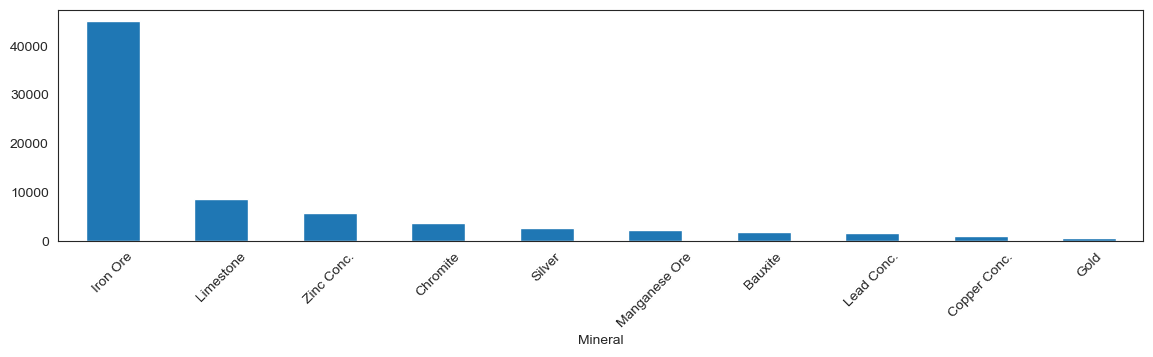

In [8]:
plt.figure(figsize=(14,3))
mine.groupby('Mineral')['Value 2018/19 (In thousand Rupees)'].sum().nlargest(10).plot(kind="bar");
plt.xticks(rotation=45);

In [11]:
mine['Quantity 2016/17'].mean()

26392.55854014599

<h2><center>States with Costlies Mining in terms of Rs/Kg</center></h2>

In [12]:
z = mine.groupby(['State',])['Value 2018/19 (In thousand Rupees)'].sum()/mine.groupby(['State',])['Quantity 2018/19 (P)'].sum()

In [13]:
c1 = mine.groupby('State')[['Quantity 2016/17','Value 2016/17 (In thousand Rupees)','Quantity 2017/18','Value 2017/18 (In thousand Rupees)','Quantity 2018/19 (P)','Value 2018/19 (In thousand Rupees)']].sum()
c1 ['Efficiency'] = 10*c1['Value 2018/19 (In thousand Rupees)']/c1['Quantity 2018/19 (P)']
c1.head()

,Quantity 2016/17,Value 2016/17 (In thousand Rupees),Quantity 2017/18,Value 2017/18 (In thousand Rupees),Quantity 2018/19 (P),Value 2018/19 (In thousand Rupees),Efficiency
State,,,,,,,
Andhra Pradesh,9843.88,933.0823,7904.58,1143.5094,5276.65,1292.3845,2.449252
Arunachal Pradesh,0.00,0.0000,0.00,0.0000,0.00,0.0000,NaN
Assam,6597.58,44.4644,8091.65,45.4352,7143.63,53.9360,0.075502
Bihar,8168.04,10.4495,7336.05,2.4886,7053.16,13.8775,0.019676
Chhattisgarh,31130.70,7067.9868,11203.15,9241.1329,17415.23,11076.2444,6.360091


In [14]:
z.sort_values(ascending=False)

State
Himachal Pradesh     14.307600
Jharkhand             0.793337
Chhattisgarh          0.636009
Andhra Pradesh        0.244925
Karnataka             0.183991
Jammu & Kashmir       0.161486
Orissa                0.113040
Madhya Pradesh        0.048609
Meghalaya             0.037658
Rajasthan             0.037037
Maharashtra           0.020340
Telangana             0.019501
Assam                 0.007550
Tamil Nadu            0.003976
Bihar                 0.001968
Uttar Pradesh         0.001259
Gujarat               0.000369
Uttarakhand           0.000162
Kerala                0.000144
Goa                   0.000004
Haryana               0.000000
West Bengal           0.000000
Arunachal Pradesh          NaN
Manipur                    NaN
Mizoram                    NaN
Nagaland                   NaN
Punjab                     NaN
Sikkim                     NaN
dtype: float64

<AxesSubplot:xlabel='State'>

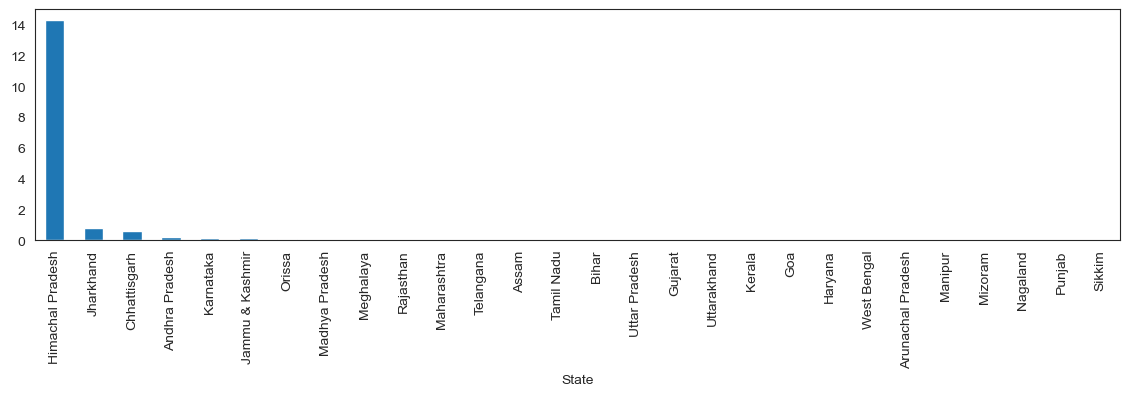

In [15]:
plt.figure(figsize=(14,3))
z.sort_values(ascending=False).plot(kind="bar")


<h3><center>Considering Himachal Pradesh a Outlier, Let us Map the rest of the states for Cost Efficiency</center></h3>

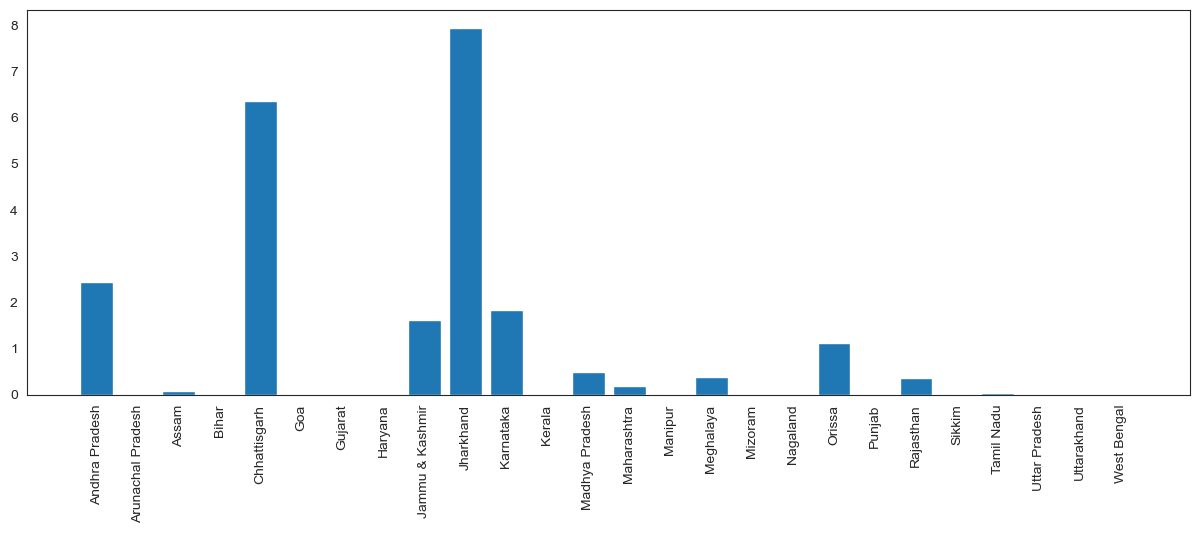

In [118]:
plt.figure(figsize=(15,5))
mf1 = states.merge(c1,how = "inner",left_on='id', right_on='State')
mf11 = mf1[mf1['id']!="Himachal Pradesh"] #himachal excluded from efficiency calculation as it has very high cost outlier like
plt.bar(mf11['id'],mf11['Efficiency'])
plt.xticks(rotation=90);


Text(82, 10.5, 'Source:- www.data.gov.in')

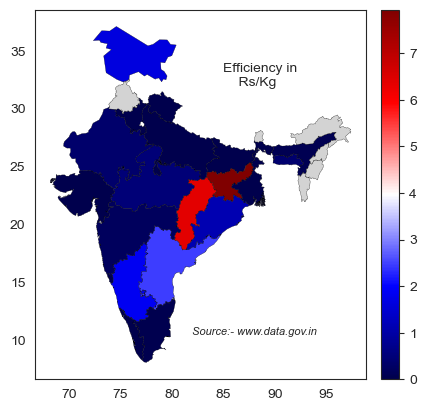

In [187]:
mf11.plot(column='Efficiency',cmap='seismic',edgecolor='black',lw=0.2,legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03},missing_kwds={"color": "lightgrey"})
plt.text (85,32,"Efficiency in \n    Rs/Kg");
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

<h2><center>States with Highest Production in Terms of Volume</center></h2>

In [10]:
mine.groupby(['State',])['Quantity 2018/19 (P)'].sum().nlargest(5)

State
Gujarat      1889083.06
Rajasthan     346461.46
Orissa        266898.84
Kerala        230269.98
Haryana       176755.00
Name: Quantity 2018/19 (P), dtype: float64

Text(82, 10.5, 'Source:- www.data.gov.in')

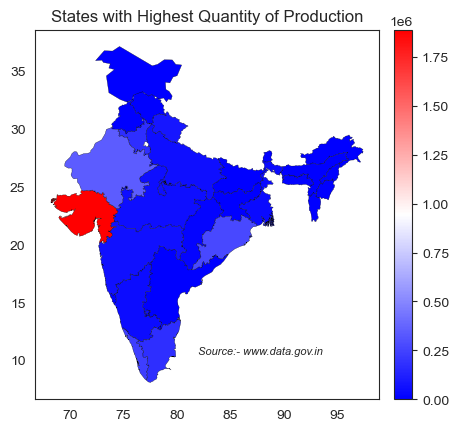

In [186]:
mf1.plot(column='Quantity 2018/19 (P)',cmap='bwr',edgecolor='black',lw=0.2,legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03},missing_kwds={"color": "lightgrey"})
plt.title("States with Highest Quantity of Production")
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

<h2><center>States with highest Ore Production in INR Crores</center></h2>

In [9]:
mine.groupby(['State',])['Value 2018/19 (In thousand Rupees)'].sum().nlargest(5)

State
Orissa            30170.2249
Rajasthan         12831.8193
Chhattisgarh      11076.2444
Karnataka          8741.8824
Madhya Pradesh     2582.1077
Name: Value 2018/19 (In thousand Rupees), dtype: float64

Text(82, 10.5, 'Source:- www.data.gov.in')

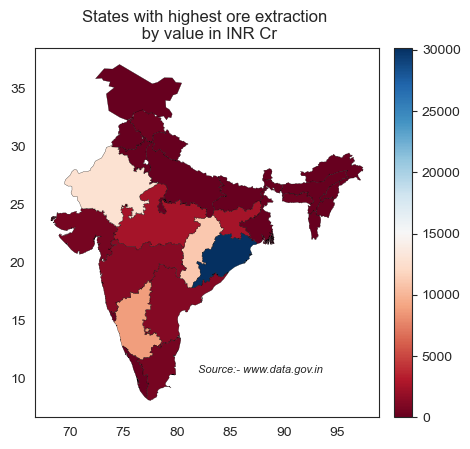

In [185]:
mf1.plot(column='Value 2018/19 (In thousand Rupees)',cmap='RdBu',lw=0.2,edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03},missing_kwds={"color": "lightgrey"})
plt.title("States with highest ore extraction \n by value in INR Cr")
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

<h2><center>State Wise Concentration of Metallic and Non Metallic Minerals in terms of INR Crores</center></h2>

Text(82, 10.5, 'Source:- www.data.gov.in')

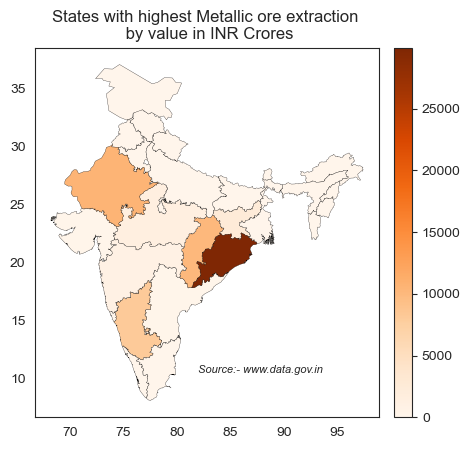

In [189]:
zb=mine[mine['Mineral Type']=='Metallic']
z2=zb.groupby(['State',])['Value 2018/19 (In thousand Rupees)'].sum()
mf2 = states.merge(z2,how = "inner",left_on='id', right_on='State')
mf2.plot(column='Value 2018/19 (In thousand Rupees)',cmap='Oranges',edgecolor='black',lw=0.2,legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03},missing_kwds={"color": "lightgrey"})
plt.title("States with highest Metallic ore extraction \n by value in INR Crores");
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

Text(82, 10.5, 'Source:- www.data.gov.in')

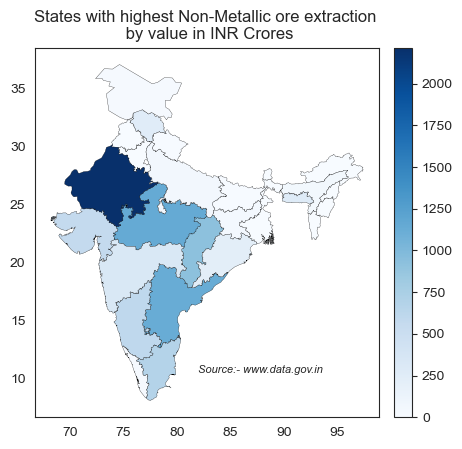

In [183]:
zc=mine[mine['Mineral Type']=='Non Metallic']
z3=zc.groupby(['State'])['Value 2018/19 (In thousand Rupees)'].sum()
mf3 = states.merge(z3,how = "inner",left_on='id', right_on='State')
mf3.plot(column='Value 2018/19 (In thousand Rupees)',lw=0.2,cmap='Blues',edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03},missing_kwds={"color": "lightgrey"})
plt.title("States with highest Non-Metallic ore extraction \n by value in INR Crores");
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

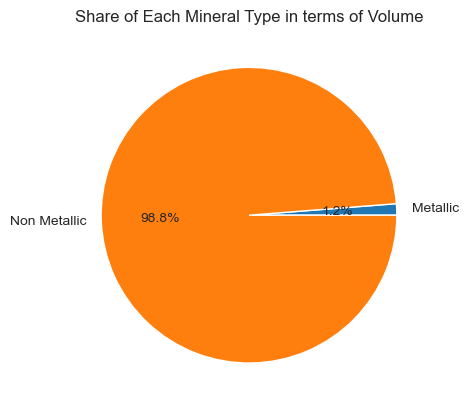

In [22]:
mine.groupby("Mineral Type")['Quantity 2018/19 (P)'].sum().plot(kind='pie',autopct='%.1f%%')
plt.ylabel(" ")
plt.title("Share of Each Mineral Type in terms of Volume");

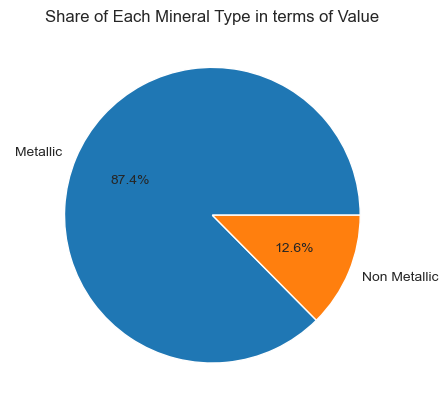

In [23]:
mine.groupby("Mineral Type")['Value 2018/19 (In thousand Rupees)'].sum().plot(kind='pie',autopct='%.1f%%')
plt.ylabel(" ")
plt.title("Share of Each Mineral Type in terms of Value");

<h2><center>Top 10 Mined Metallic Minerals in terms of Volumes</center></h2>

<AxesSubplot:ylabel='Mineral'>

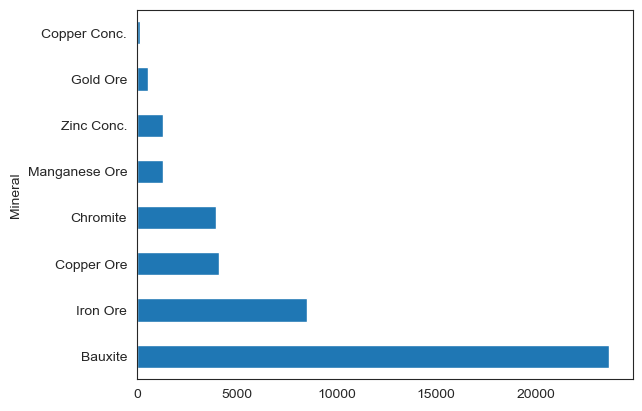

In [73]:
Met = mine[mine["Mineral Type"]=="Metallic"]
Met.groupby('Mineral')['Quantity 2018/19 (P)'].sum().nlargest(8).plot(kind='barh')

<h2><center>Top 10 Metallic Mined Minerals in INR Crores</center></h2>

<AxesSubplot:ylabel='Mineral'>

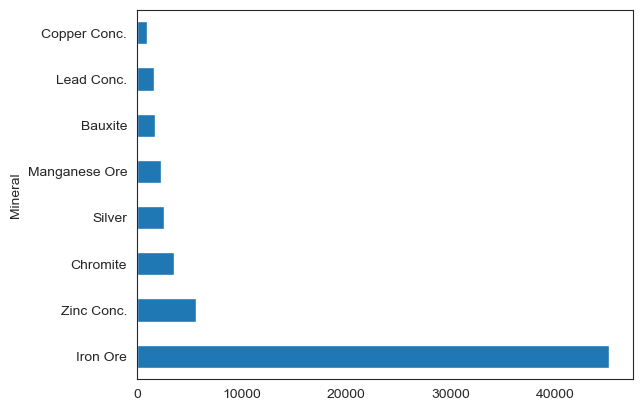

In [74]:
Met.groupby('Mineral')['Value 2018/19 (In thousand Rupees)'].sum().nlargest(8).plot(kind='barh')

<h2><center>Top 5 States producting each Metallic Mineral in terms of Volume</center></h2>

In [219]:
Met = mine[mine["Mineral Type"]=="Metallic"]
Met.groupby("State")['Quantity 2018/19 (P)'].sum().nlargest(5)
                                                        

State
Orissa            20328.54
Rajasthan          3471.77
Madhya Pradesh     3353.53
Chhattisgarh       2989.77
Jharkhand          2957.51
Name: Quantity 2018/19 (P), dtype: float64

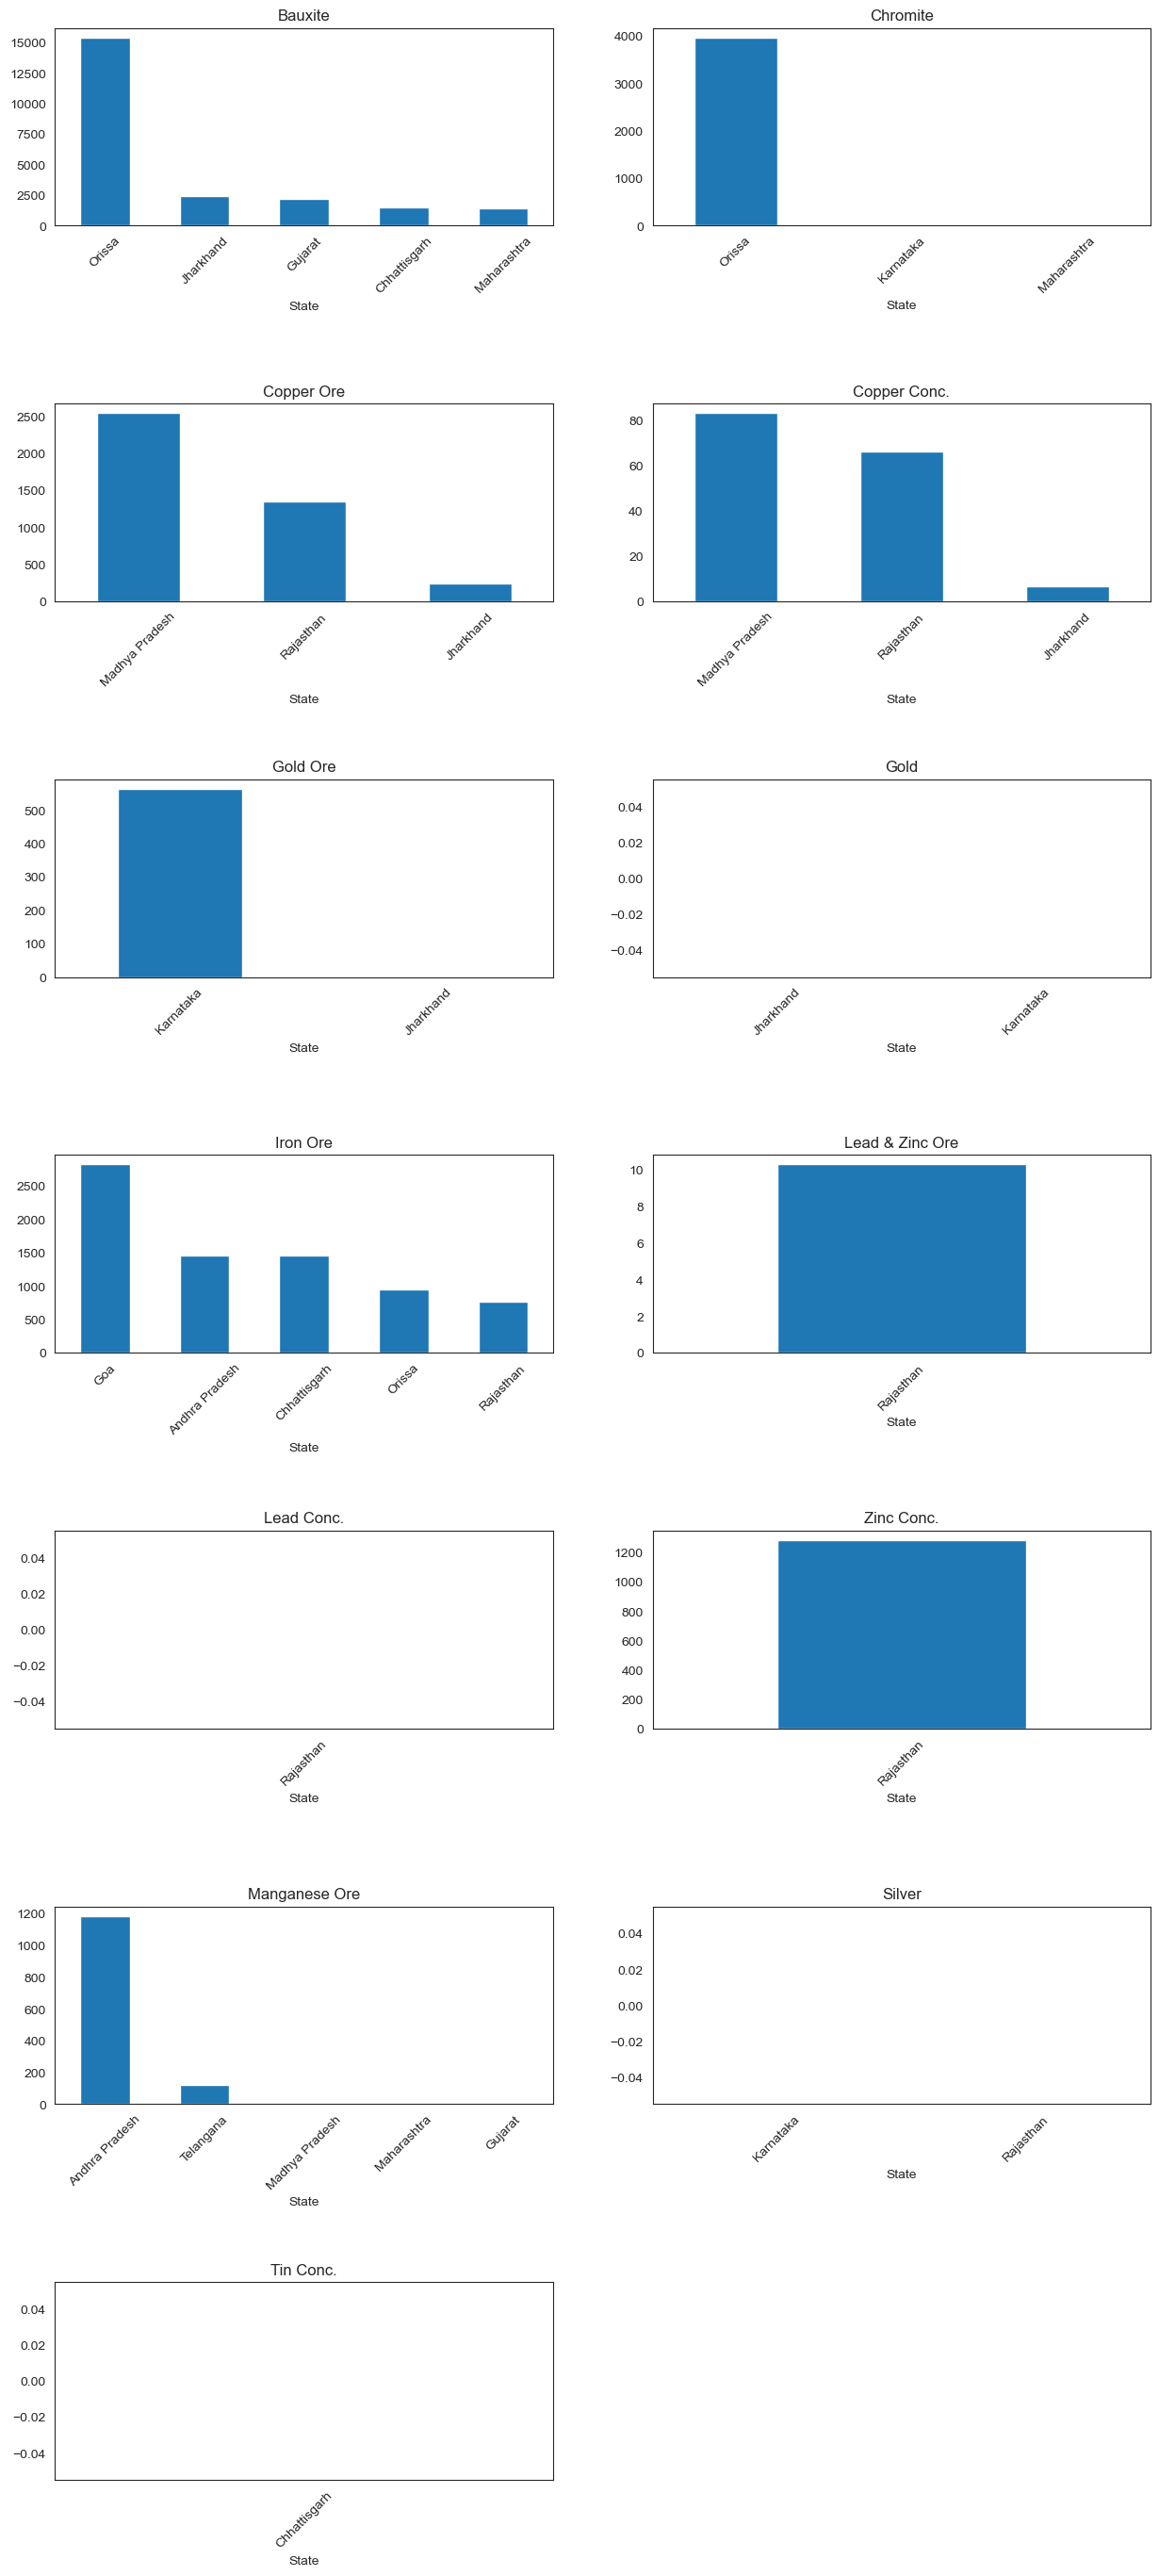

In [26]:
a1 = Met["Mineral"].unique()
plt.figure(figsize=(15,15))
for i in range (0,len(a1)):
    plt.subplot(8,2,i+1)
    plt.subplots_adjust(top = 2, bottom=0, hspace=0.9, wspace=0.2)
    MP = Met[Met["Mineral"]==a1[i]].groupby('State')['Quantity 2018/19 (P)'].sum().nlargest(5).plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(a1[i])

<h2><center>Top 5 States producting each Metallic Mineral in terms of Value</center></h2>

In [218]:
Met = mine[mine["Mineral Type"]=="Metallic"]
Met.groupby("State")['Value 2018/19 (In thousand Rupees)'].sum().nlargest(5)

State
Orissa          29938.3006
Rajasthan       10617.0901
Chhattisgarh    10153.7476
Karnataka        8142.6801
Jharkhand        2466.3272
Name: Value 2018/19 (In thousand Rupees), dtype: float64

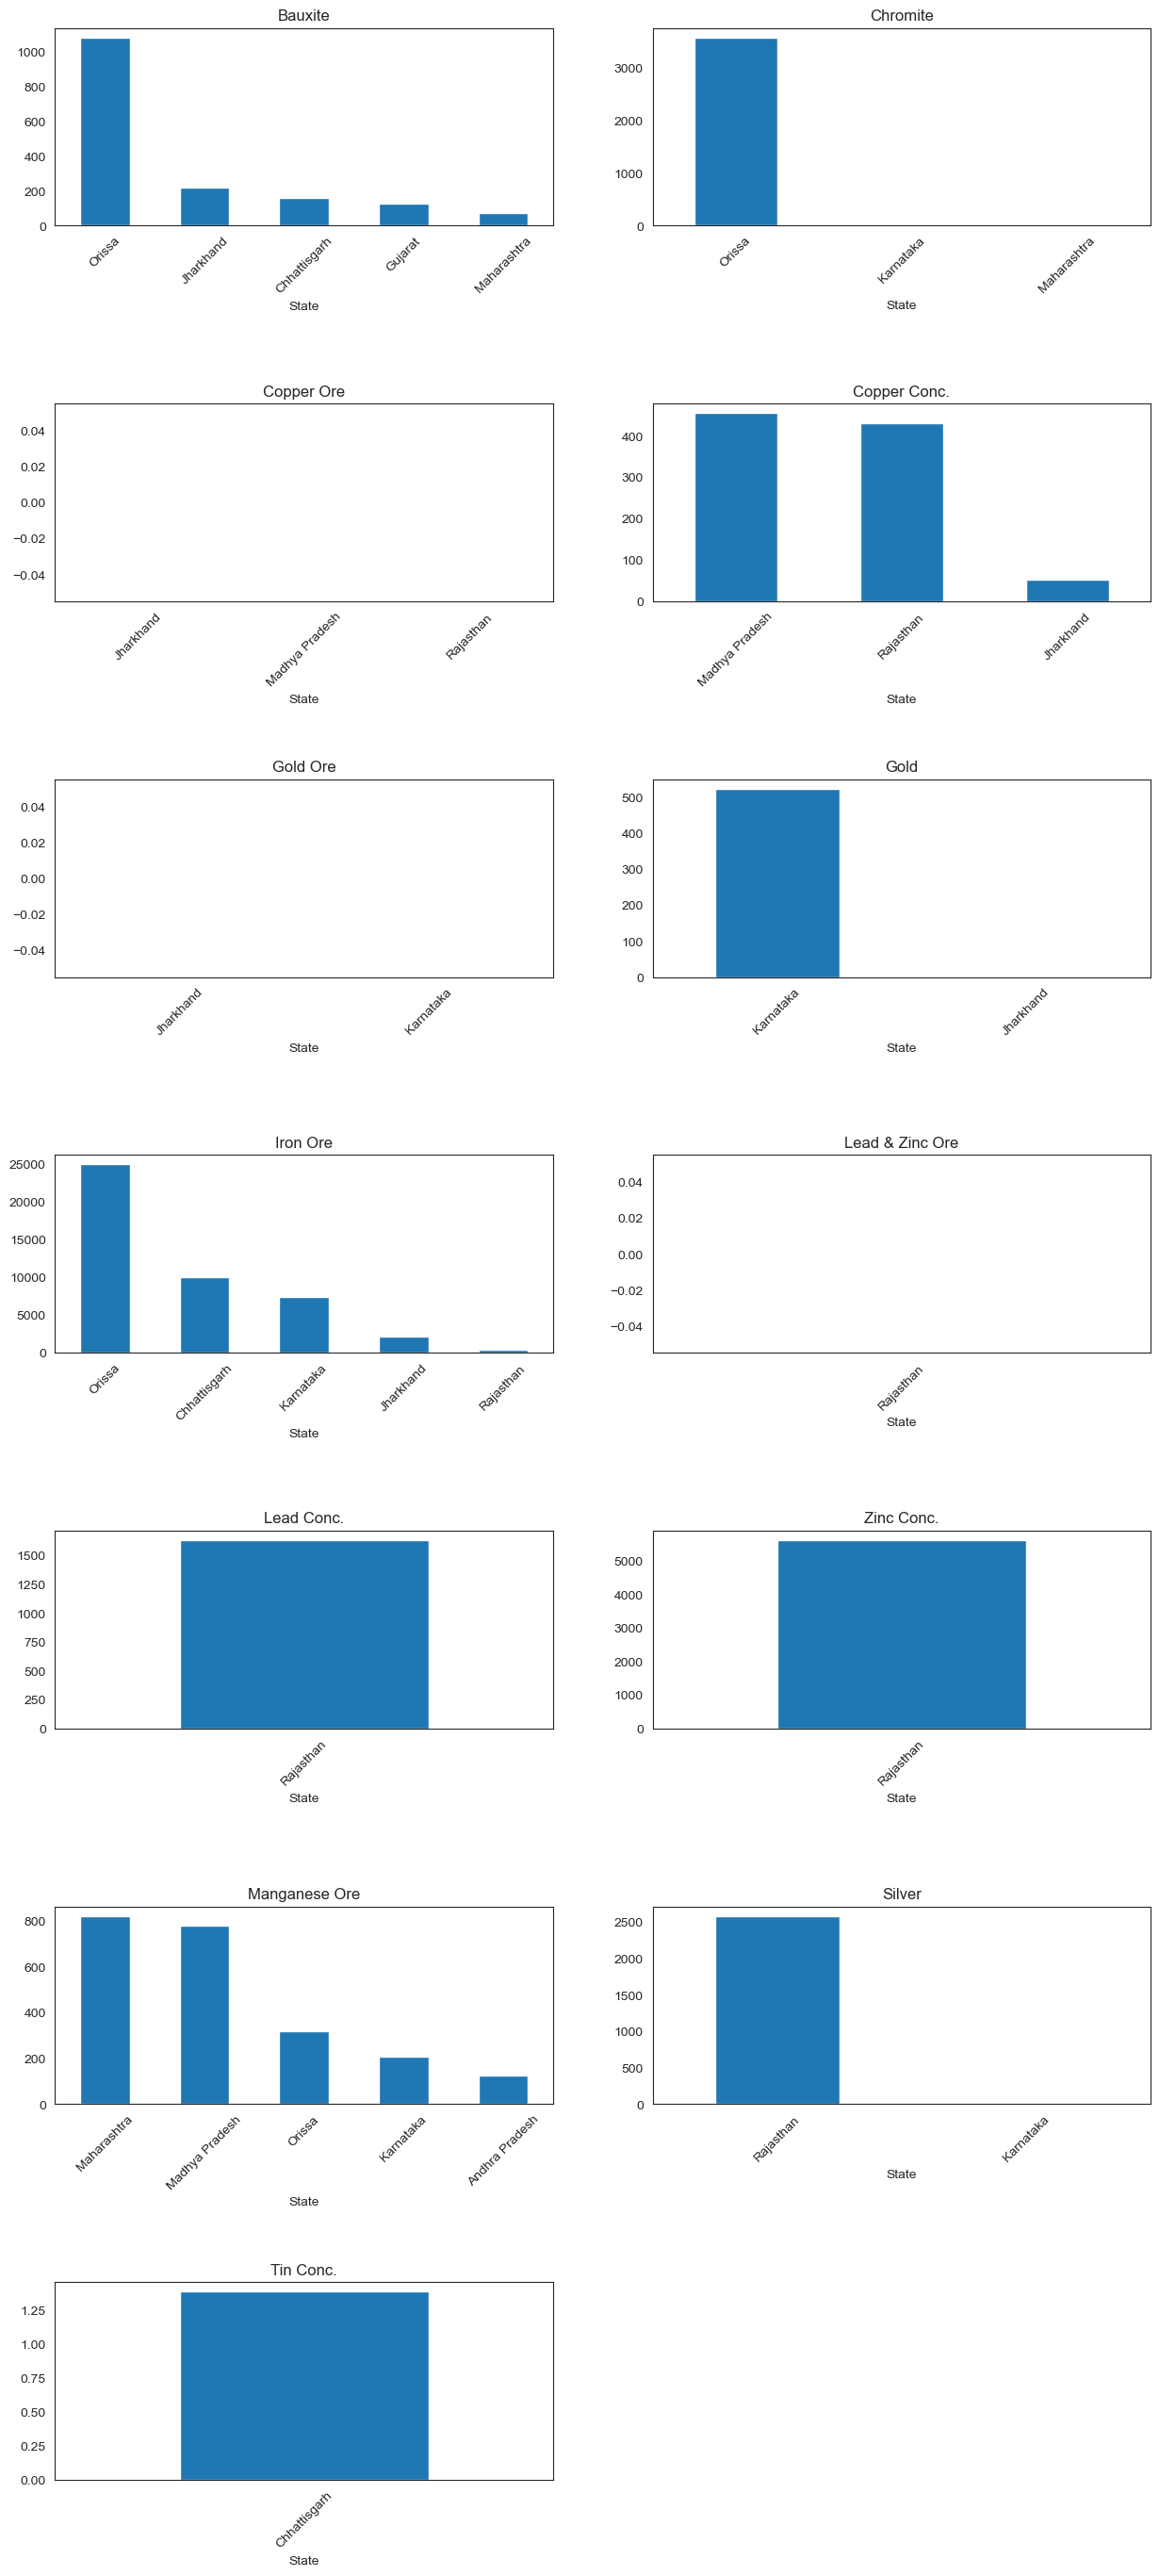

In [27]:
a1 = Met["Mineral"].unique()
plt.figure(figsize=(15,15))
for i in range (0,len(a1)):
    plt.subplot(8,2,i+1)
    plt.subplots_adjust(top = 2, bottom=0, hspace=0.9, wspace=0.2)
    MP = Met[Met["Mineral"]==a1[i]].groupby('State')['Value 2018/19 (In thousand Rupees)'].sum().nlargest(5).plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(a1[i])

<h2><center>Top 10 Non-Metallic Mined Minerals in terms of Volume</center></h2>

<AxesSubplot:xlabel='Mineral'>

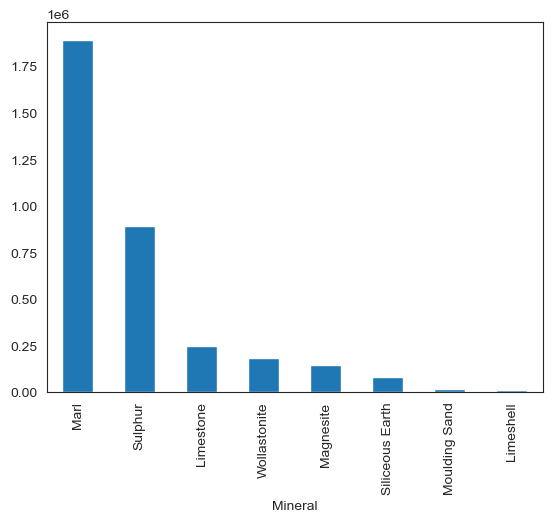

In [80]:
Non_Met = mine[mine["Mineral Type"]=="Non Metallic"]
Non_Met.groupby('Mineral')['Quantity 2018/19 (P)'].sum().nlargest(8).plot(kind='bar')

<h2><center>Top 10 Non-Metallic Mined Minerals in terms of INR Crores</center></h2>

<AxesSubplot:xlabel='Mineral'>

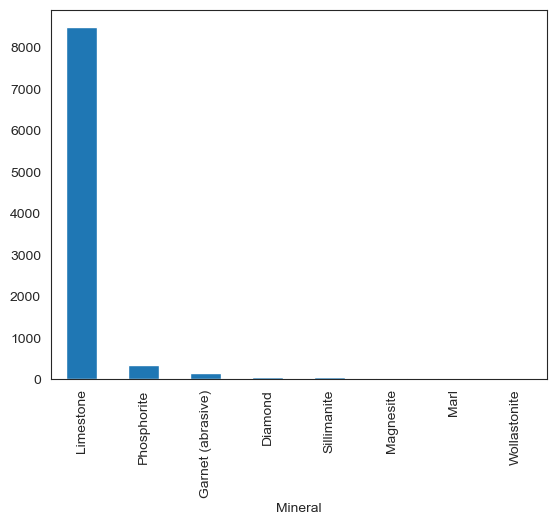

In [78]:
Non_Met.groupby('Mineral')['Value 2018/19 (In thousand Rupees)'].sum().nlargest(8).plot(kind='bar')

<h2><center>Top 5 States producting each Non-Metallic Mineral in terms of Quantity</center></h2>

<AxesSubplot:xlabel='State'>

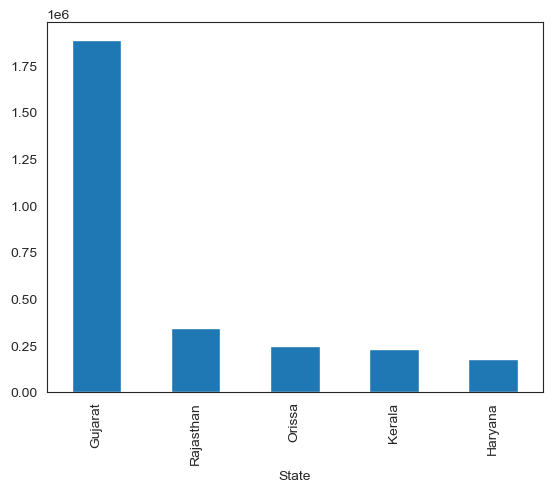

In [215]:
Non_Met = mine[mine["Mineral Type"]=="Non Metallic"]
Non_Met.groupby("State")['Quantity 2018/19 (P)'].sum().nlargest(5).plot(kind='bar')

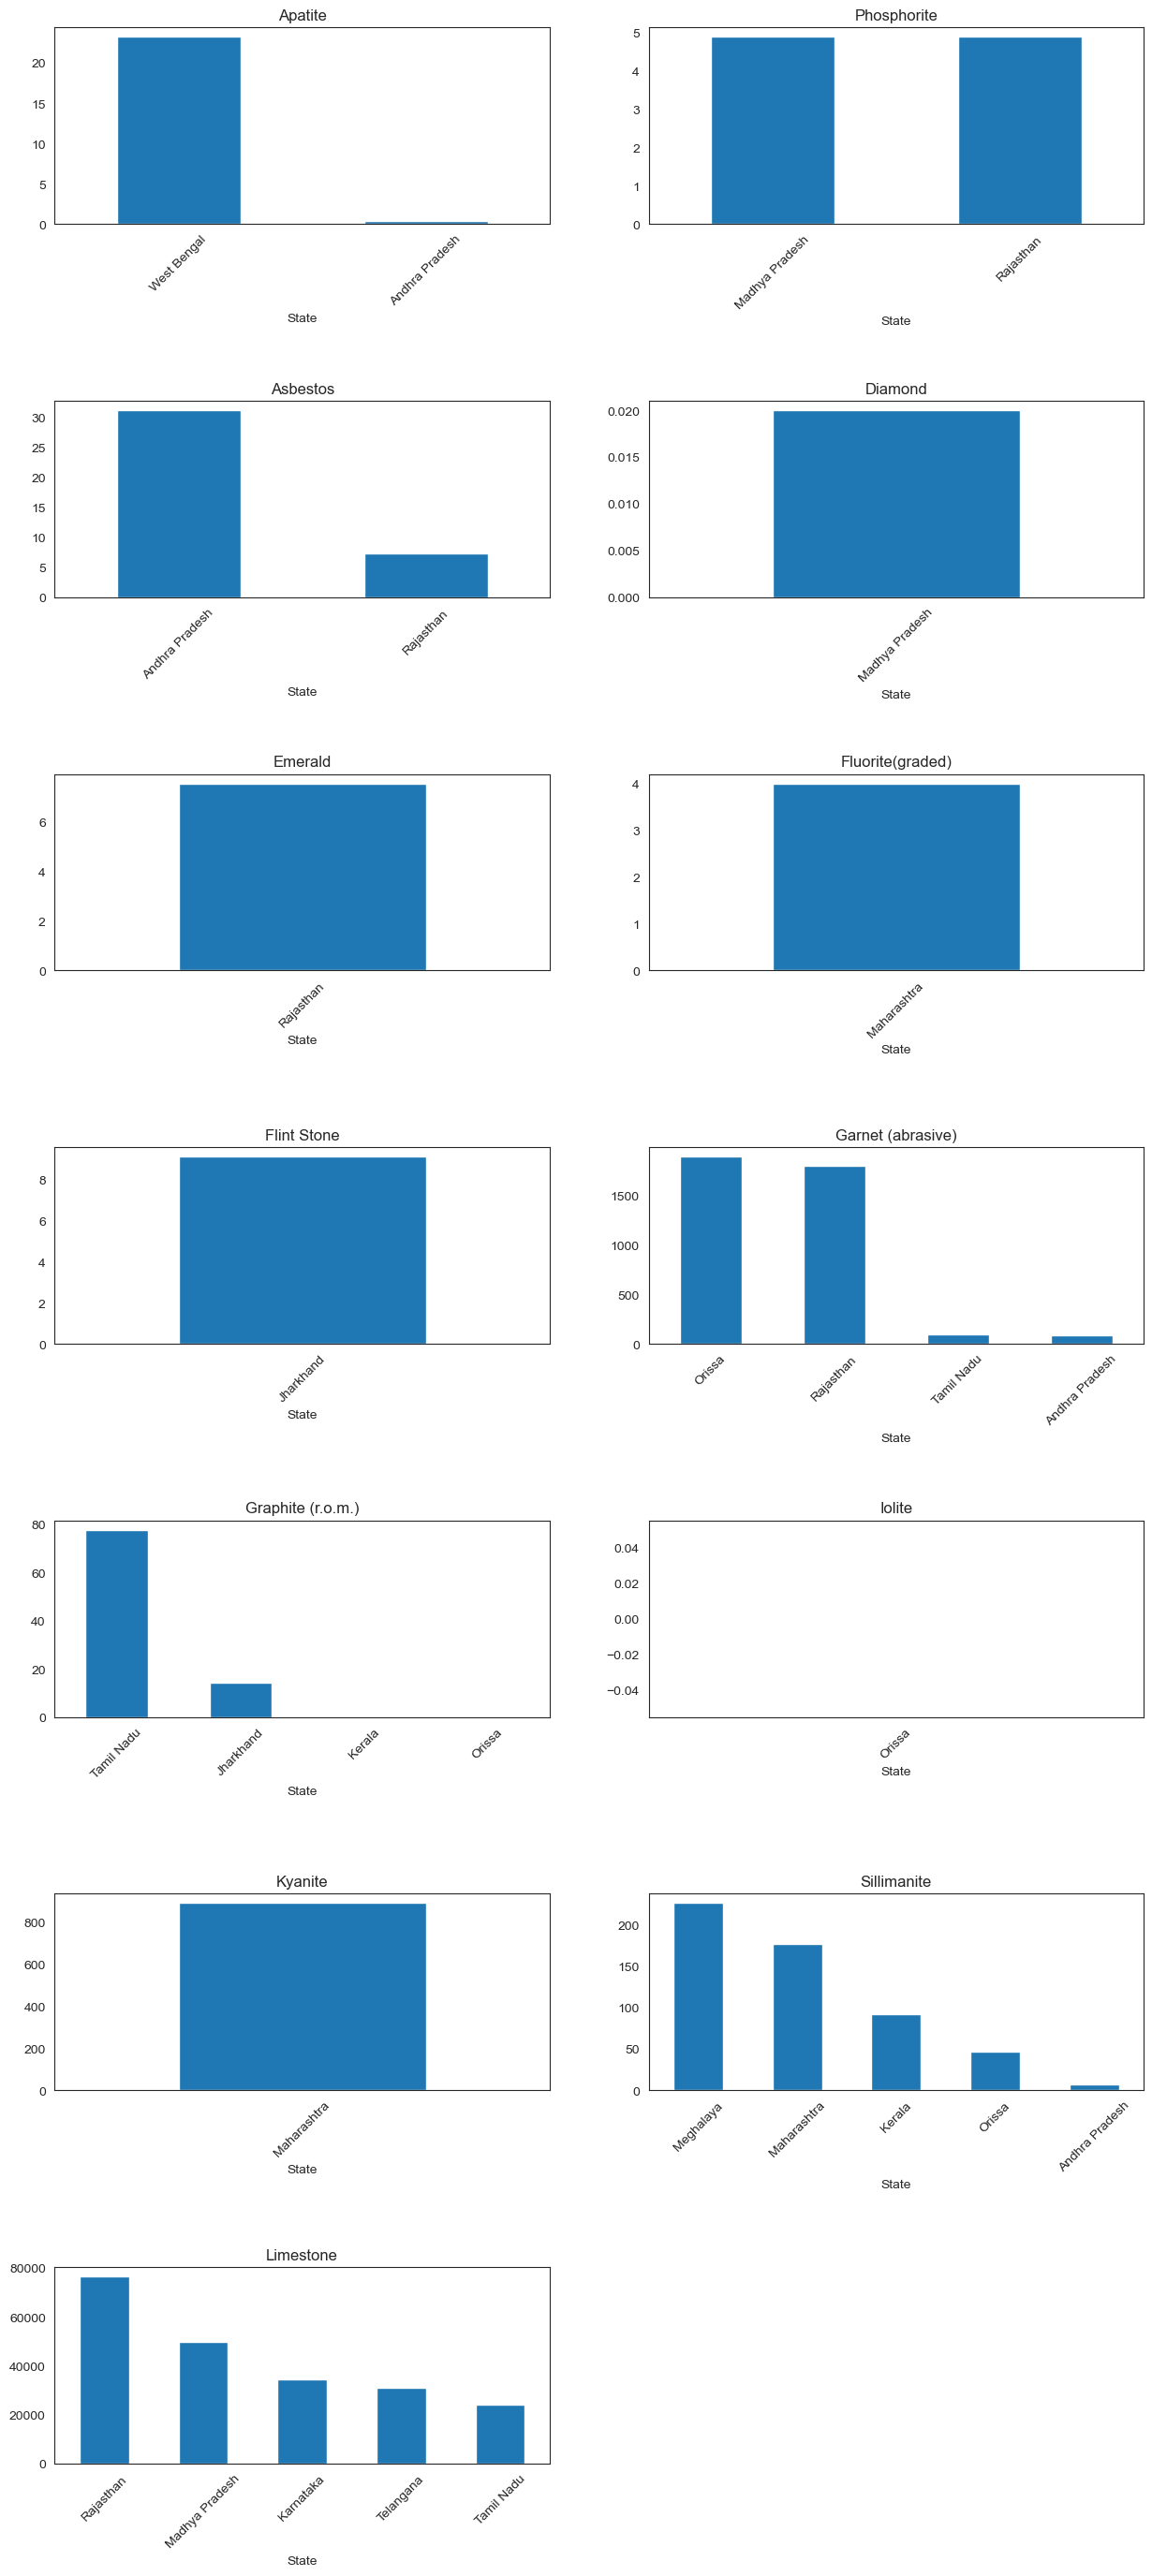

In [30]:
Non_Met = mine[mine["Mineral Type"]=="Non Metallic"]
a2 = Non_Met["Mineral"].unique()
plt.figure(figsize=(15,15))
for i in range (0,len(a1)):
    plt.subplot(8,2,i+1)
    plt.subplots_adjust(top = 2, bottom=0, hspace=0.9, wspace=0.2)
    MP = Non_Met[Non_Met["Mineral"]==a2[i]].groupby('State')['Quantity 2018/19 (P)'].sum().nlargest(5).plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(a2[i])

<h2><center>Top 5 States producting each Non-Metallic Mineral in terms of INR Crores</center></h2>

<AxesSubplot:xlabel='State'>

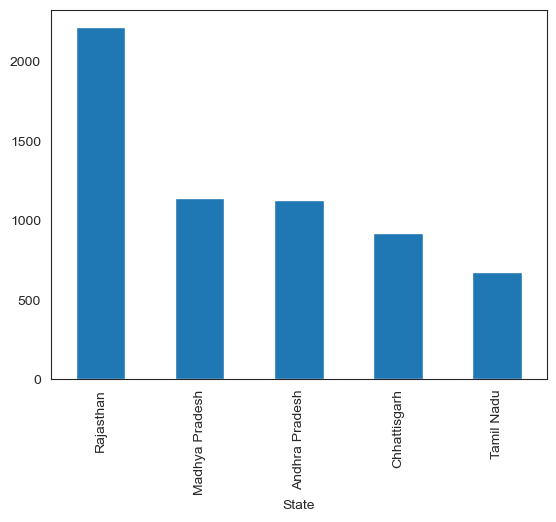

In [214]:
Non_Met = mine[mine["Mineral Type"]=="Non Metallic"]
Non_Met.groupby("State")['Value 2018/19 (In thousand Rupees)'].sum().nlargest(5).plot(kind='bar')

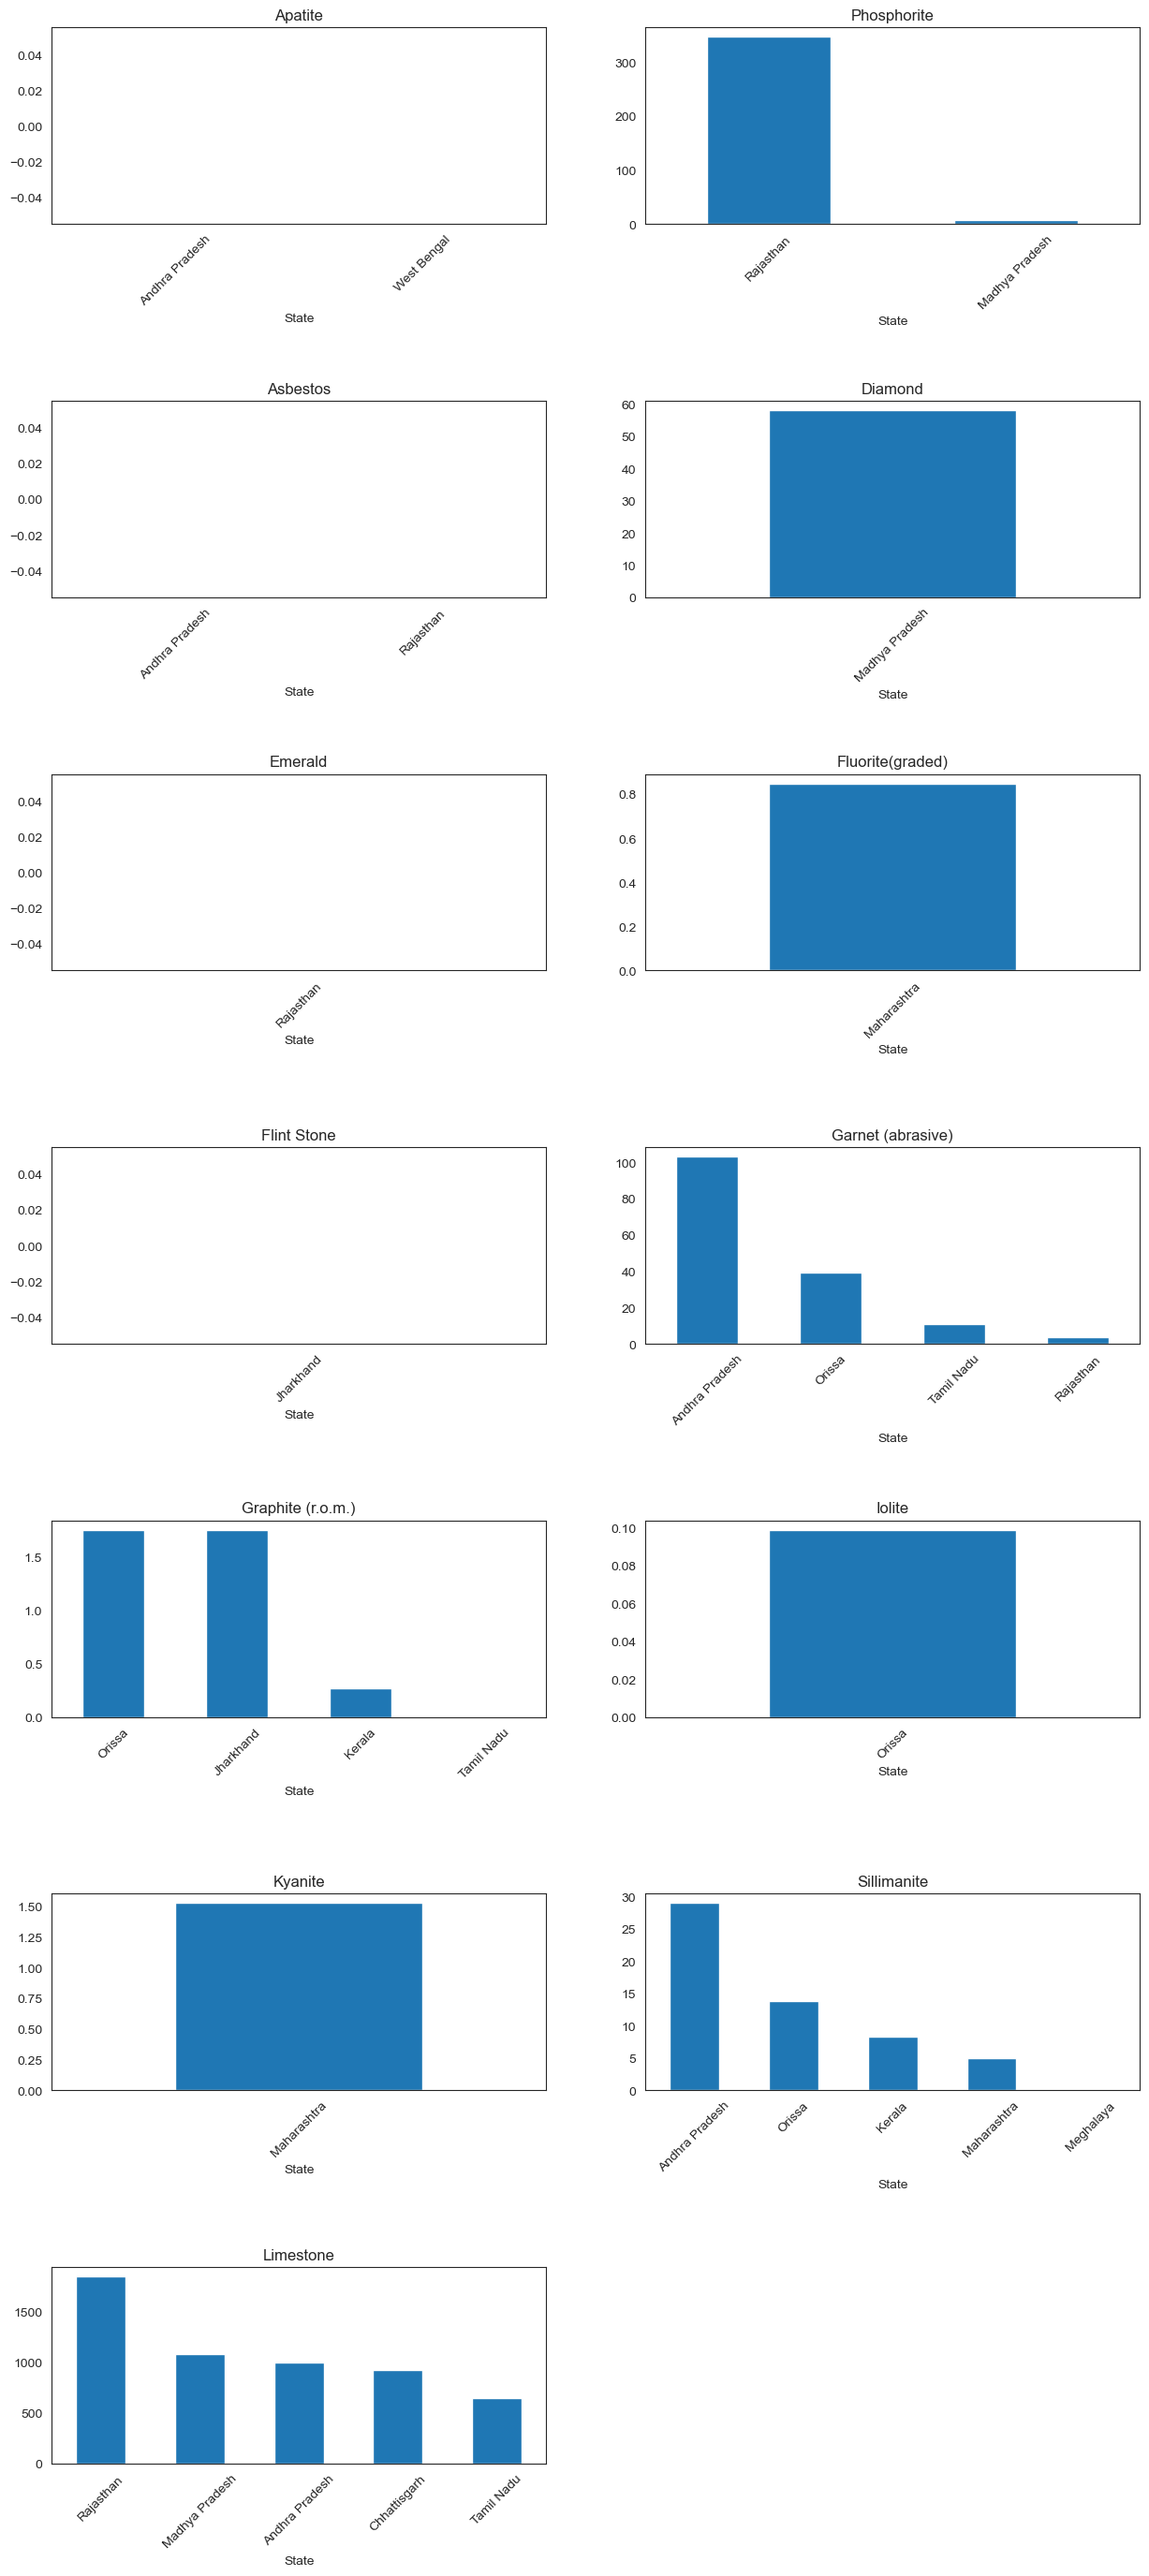

In [31]:
Non_Met = mine[mine["Mineral Type"]=="Non Metallic"]
a2 = Non_Met["Mineral"].unique()
plt.figure(figsize=(15,15))
for i in range (0,len(a1)):
    plt.subplot(8,2,i+1)
    plt.subplots_adjust(top = 2, bottom=0, hspace=0.9, wspace=0.2)
    MP = Non_Met[Non_Met["Mineral"]==a2[i]].groupby('State')['Value 2018/19 (In thousand Rupees)'].sum().nlargest(5).plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(a2[i])

<h2><center>State Wise AQI Data Analysis</center></h2>

Text(0.5, 1.0, 'AQI')

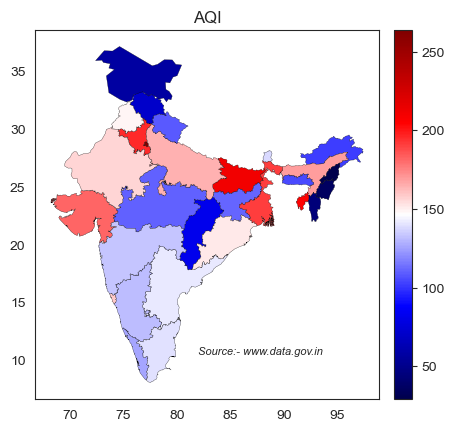

In [182]:
aqi = pd.read_csv("D:/DOWNLOADS/aqi.csv")
af1 = states.merge(aqi,how = "inner",left_on='id', right_on='STATES')
af1.plot(column="AQI",lw=0.2,cmap='seismic',edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03})
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')
plt.title("AQI")

Text(0.5, 1.0, 'PM 2.5')

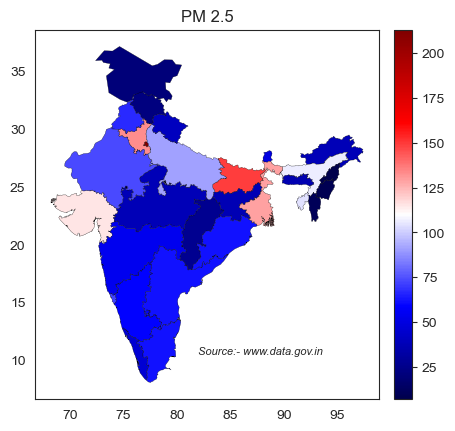

In [181]:
af1.plot(column="PM2.5",lw=0.2,cmap='seismic',edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03})
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')
plt.title("PM 2.5")

Text(0.5, 1.0, 'PM 10')

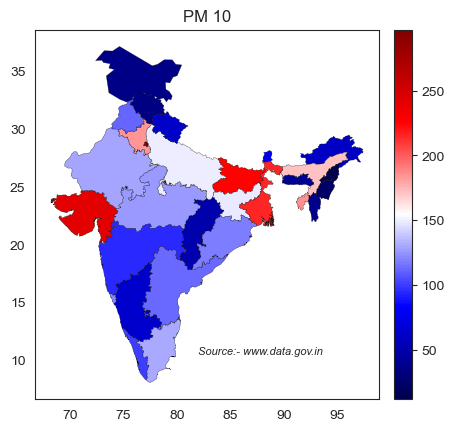

In [180]:
af1.plot(column="PM10",lw=0.2,cmap='seismic',edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03})
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')
plt.title("PM 10")

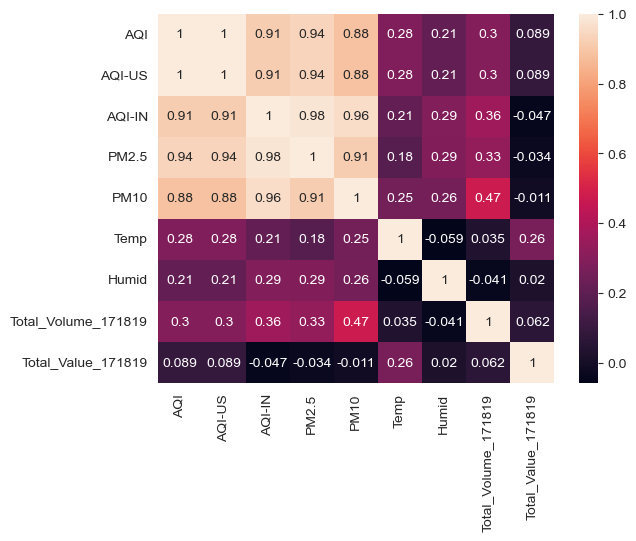

In [35]:
se = mine.groupby('State')[['Quantity 2016/17','Quantity 2017/18','Quantity 2018/19 (P)','Value 2016/17 (In thousand Rupees)','Value 2017/18 (In thousand Rupees)','Value 2018/19 (In thousand Rupees)']].sum() 
se["Total_Volume_171819"] =  se.iloc[:,0]+se.iloc[:,1]+se.iloc[:,2]
se["Total_Value_171819"] =  se.iloc[:,3]+se.iloc[:,4]+se.iloc[:,5]
normalized_se=(se-se.mean())/se.std()
v=aqi.merge(se, how='inner', left_on='STATES', right_on = 'State')
v.drop(['Status','STATES','Quantity 2016/17','Quantity 2017/18','Quantity 2018/19 (P)','Value 2016/17 (In thousand Rupees)','Value 2017/18 (In thousand Rupees)','Value 2018/19 (In thousand Rupees)'],axis=1,inplace=True)
normalized_v=(v-v.mean())/v.std()
normalized_v.corr(method='pearson')
sns.heatmap(normalized_v.corr(),annot=True);

In [165]:
hdi = pd.read_csv('D:/DOWNLOADS/hdi.csv')
lwe =  pd.read_csv('D:/DOWNLOADS/image_2023-01-16_231239665.png.csv')
af2 = states.merge(hdi,how = "inner",left_on='id', right_on='State')
af3= states.merge(lwe,how = "inner",left_on='id', right_on='State')
af2.head()

,id,geometry,Rank,State,HDI (2019)
0,Andhra Pradesh,"MULTIPOLYGON (((80.14917 13.61830, 80.14203 13...",27,Andhra Pradesh,0.649
1,Arunachal Pradesh,"POLYGON ((95.23773 26.68643, 95.21632 26.73550...",24,Arunachal Pradesh,0.661
2,Assam,"POLYGON ((95.95224 27.94196, 95.75867 27.72653...",30,Assam,0.613
3,Bihar,"POLYGON ((88.10556 26.53925, 88.14526 26.51115...",36,Bihar,0.574
4,Chhattisgarh,"POLYGON ((84.00271 22.52069, 83.97594 22.50240...",31,Chhattisgarh,0.611


<h2><center>State Wise HDI for 2019</center></h2>

Text(82, 10.5, 'Source:- www.data.gov.in')

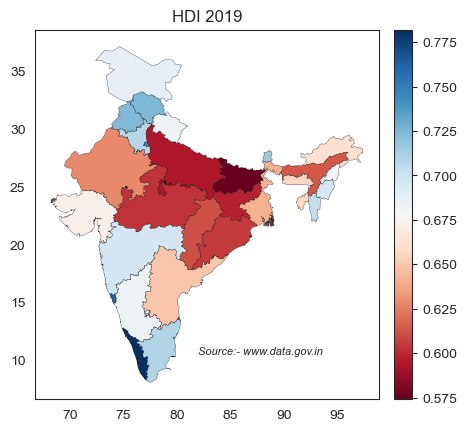

In [179]:
af2.plot(column='HDI (2019)',lw=0.2,cmap='RdBu',edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03})
plt.title("HDI 2019")
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

<h2><center>State With Naxal Attacks for 2019</center></h2>

Text(82, 10.5, 'Source:- www.data.gov.in')

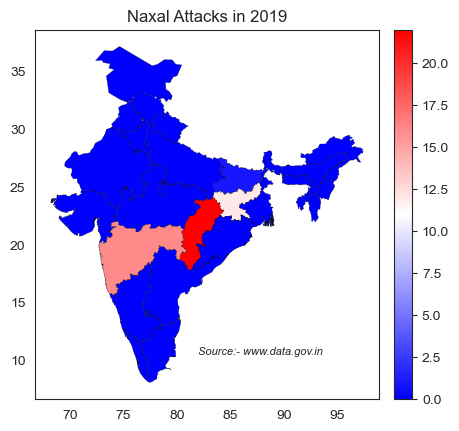

In [177]:
af3.plot(column='LWE Attacks',lw=0.2,cmap='bwr',edgecolor='black',legend=True,legend_kwds={"orientation": "vertical", "pad": 0.03})
plt.title("Naxal Attacks in 2019")
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

<h2><center>State With Insurgency and Terrorism</center></h2>

Text(82, 10.5, 'Source:- www.data.gov.in')

<Figure size 1500x1500 with 0 Axes>

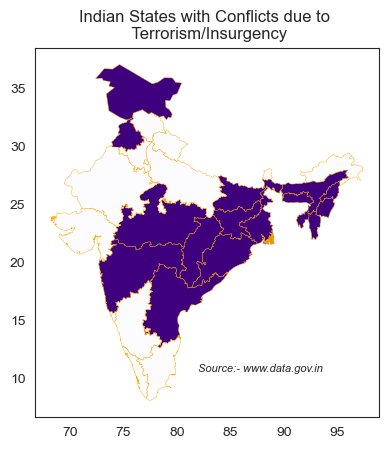

In [176]:
conf = pd.read_csv('D:/DOWNLOADS/conflict.csv')
af4 = states.merge(conf,how = "inner",left_on='id', right_on='State')
plt.figure(figsize=(15,15))
af4.plot(column='Conflict',lw=0.3,cmap='Purples',edgecolor='orange',legend=False,legend_kwds={"orientation": "vertical", "pad": 0.03})
plt.title('Indian States with Conflicts due to \n Terrorism/Insurgency')
plt.text (82,10.5,'Source:- www.data.gov.in', size=8,style='italic')

In [188]:
x3.describe()

,Total_Volume_171819,Total_Value_171819,HDI (2019),LWE Attacks
count,2.900000e+01,29.000000,29.000000,29.000000
mean,3.892730e+05,8506.086234,0.666828,1.793103
std,1.142454e+06,18033.456593,0.052964,5.320978
min,0.000000e+00,0.000000,0.574000,0.000000
25%,5.033000e+02,0.000000,0.613000,0.000000
50%,5.974908e+04,718.589000,0.672000,0.000000
75%,2.186850e+05,3674.296100,0.704000,0.000000
max,6.169355e+06,65799.830500,0.782000,22.000000


<AxesSubplot:>

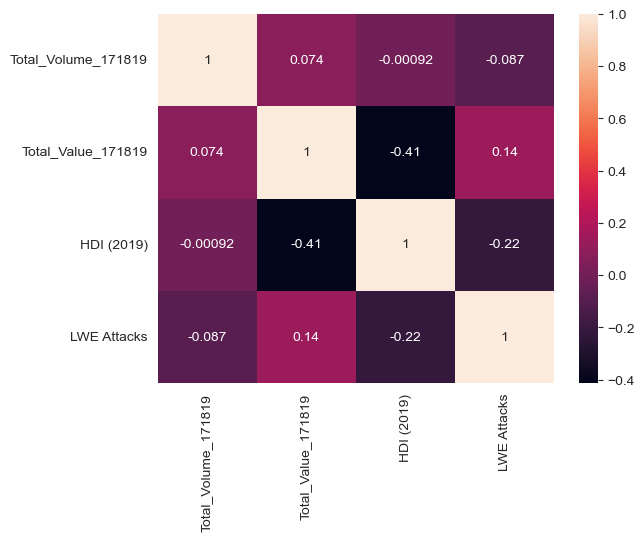

In [170]:
va=aqi.merge(se, how='inner', left_on='STATES', right_on = 'State')
x1=va.merge(hdi, how='inner', left_on='STATES',right_on='State')
x2= x1.merge(lwe, how='inner', left_on='STATES', right_on = 'State')
x3=x2[['Total_Volume_171819','Total_Value_171819','HDI (2019)','LWE Attacks']]
sns.heatmap(x3.corr(method='pearson'),annot=True)

In [220]:
pip install notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.
  Using cached notebook_as_pdf-0.5.0-py3-none-any.whl (6.5 kB)
     -------------------------------------- 232.6/232.6 kB 7.2 MB/s eta 0:00:00
  Using cached pyppeteer-1.0.2-py3-none-any.whl (83 kB)
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 101.4/101.4 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
